# Imports   

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

# Processing Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
for data_set in (x_train, y_train, x_test, y_test):
    print(f'Shape: {data_set.shape}') 

Shape: (60000, 28, 28)
Shape: (60000,)
Shape: (10000, 28, 28)
Shape: (10000,)


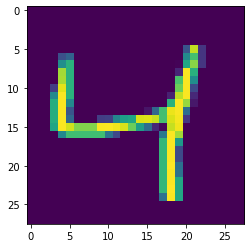

In [5]:
plt.imshow(x_train[2])

# Training Model

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(170, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                135160    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 135,160
Trainable params: 135,160
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5720 - accuracy: 0.9052
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5162 - accuracy: 0.9507
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5038 - accuracy: 0.9612
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4970 - accuracy: 0.9672
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4924 - accuracy: 0.9716
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4892 - accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4864 - accuracy: 0.9766
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4848 - accuracy: 0.9780
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4829 - accuracy: 0.9796
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.481

In [11]:
tf.__version__

'2.3.0'

# Testing Model

In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.4873 - accuracy: 0.9745


[1.487250566482544, 0.9745000004768372]

In [13]:
def predict_img(x):
    img1 = Image.open(x).convert(mode='F')
    array1 = (np.array(img1.getdata()).reshape((28,28)) - 255) * -1

    reshaped = array1.reshape(28,28)
    final_img_data = np.expand_dims(reshaped, axis=0) / 255.0

    prediction = model.predict(final_img_data)

    plt.imshow(array1)
    print('Prediction:', np.argmax(prediction))
    print('Output Array:', prediction)
    # return prediction, np.argmax(prediction), array1

Prediction: 6
Output Array: [[3.1405078e-18 8.0159459e-36 1.9278410e-07 4.5040294e-26 7.2315808e-16
  5.7125986e-18 9.9999976e-01 4.3207214e-34 3.2911311e-21 5.1663757e-34]]


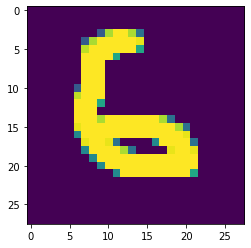

In [14]:
predict_img('../test_images/drawing6.png')

Prediction: 3
Output Array: [[2.5676260e-20 6.5011818e-06 1.3023431e-03 9.9869114e-01 0.0000000e+00
  3.6302638e-15 3.0553947e-28 1.1726294e-27 1.4647533e-13 2.2502980e-26]]


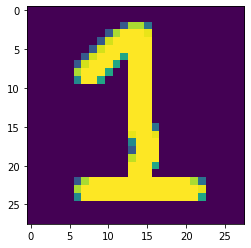

In [15]:
predict_img('../test_images/drawing1.png')

Prediction: 2
Output Array: [[7.5708149e-24 4.9958622e-15 9.9999797e-01 2.0579080e-06 0.0000000e+00
  1.8245134e-21 9.0574597e-37 2.8876723e-20 5.2773791e-14 4.8149589e-34]]


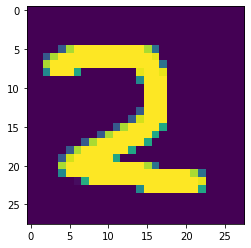

In [16]:
predict_img('../test_images/drawing2.png')

Prediction: 3
Output Array: [[1.9068330e-36 8.1161820e-24 4.5101293e-28 1.0000000e+00 6.7320018e-36
  7.7073726e-26 0.0000000e+00 3.0645820e-30 3.1006652e-26 4.8366899e-27]]


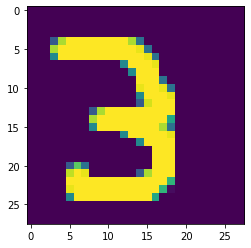

In [17]:
predict_img('../test_images/drawing3.png')

# Saving Model

In [21]:
model.save('trained_digit_model.h5')